# Ouverture du fichier state

In [7]:
import torch

In [8]:
def load_state(filepath: str):
    """Load RNG states for PyTorch, CUDA and epochs number."""
    global metrics_history

    states = torch.load(filepath)
    
    curent_epoch=states['curent_epoch']
    metrics_history=states['metrics_history']

    # torch.set_rng_state(states['torch_state'])
    # if torch.cuda.is_available() and states['torch_cuda_state'] is not None:
    #     torch.cuda.set_rng_state_all(states['torch_cuda_state'])
    
    print(f"RNG states loaded from {filepath}")
    return curent_epoch

In [9]:
curent_epoch = load_state("checkpoints/state_file.pth")

RNG states loaded from checkpoints/state_file.pth


In [10]:
from matplotlib import pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [14]:
metrics_history["train_loss"] = [a.item() for a in metrics_history["train_loss"][1:]]
metrics_history["valid_loss"] = [a.item() for a in metrics_history["valid_loss"][1:]]
metrics_history["train_acc"] = [a.item() for a in metrics_history["train_acc"][1:]]
metrics_history["valid_acc"] = [a.item() for a in metrics_history["valid_acc"][1:]]

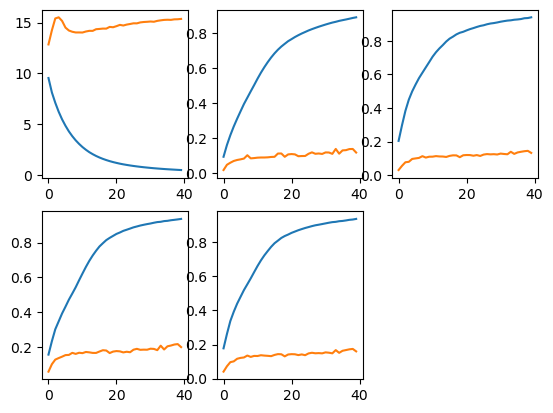

In [16]:
plt.figure()
plt.subplot(2, 3, 1)
plt.plot(metrics_history["train_loss"][:], label="train_loss")
plt.plot(metrics_history["valid_loss"][:], label="valid_loss")
plt.subplot(2, 3, 2)
plt.plot(metrics_history["train_acc"][:], label="train_acc")
plt.plot(metrics_history["valid_acc"][:], label="valid_acc")
plt.subplot(2, 3, 3)
plt.plot(metrics_history["train_p"][1:], label="train_p")
plt.plot(metrics_history["valid_p"][1:], label="valid_p")
plt.subplot(2, 3, 4)
plt.plot(metrics_history["train_r"][1:], label="train_r")
plt.plot(metrics_history["valid_r"][1:], label="valid_r")
plt.subplot(2, 3, 5)
plt.plot(metrics_history["train_f1"][1:], label="train_f1")
plt.plot(metrics_history["valid_f1"][1:], label="valid_f1")